In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


for dirname, _, filenames in os.walk('C:\\Users\\koren\\jupiter\\titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\koren\jupiter\titanic\test.csv
C:\Users\koren\jupiter\titanic\train.csv


In [2]:
train_path = 'C:\\Users\\koren\\jupiter\\titanic\\train.csv'
test_path = 'C:\\Users\\koren\\jupiter\\titanic\\test.csv'
train_titanic_df = pd.read_csv(train_path)
test_titanic_df = pd.read_csv(test_path)
train_titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_titanic_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_titanic_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
titanic_df = pd.concat([train_titanic_df,test_titanic_df], sort=True).reset_index(drop=True)
titanic_df = titanic_df.drop(columns=['Ticket'], axis=1)
titanic_df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN


In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


In [8]:
titanic_df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
dtype: int64

In [9]:
def proc_cabin(series: pd.Series):
    series = series.str[0] if series.str else None
    series = series.fillna('Unknown')
    return series


In [10]:
titanic_df['Cabin'] = proc_cabin(titanic_df['Cabin'])

In [11]:
titanic_df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [12]:
import re
def title_name(series):
     return series.apply(lambda name: re.search(r"\b(Mr|Mrs|Miss)\b", name).group(0)
                       if re.search(r"\b(Mr|Mrs|Miss)\b", name) 
                       else 'Unknown')

In [13]:
titanic_df['Name'] = title_name(titanic_df['Name'])

In [14]:
titanic_df.rename(columns={'Name':'Title'})
titanic_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,Unknown,S,7.2500,Mr,0,1,3,male,1,0.0
1,38.0,C,C,71.2833,Mrs,0,2,1,female,1,1.0
2,26.0,Unknown,S,7.9250,Miss,0,3,3,female,0,1.0
3,35.0,C,S,53.1000,Mrs,0,4,1,female,1,1.0
4,35.0,Unknown,S,8.0500,Mr,0,5,3,male,0,0.0


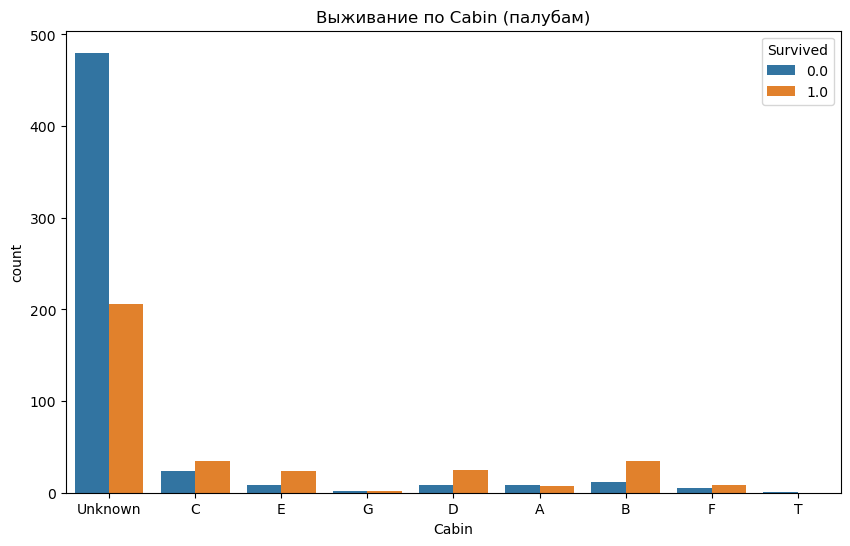

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=titanic_df[:890], x="Cabin", hue="Survived")
plt.title("Выживание по Cabin (палубам)")
plt.show()

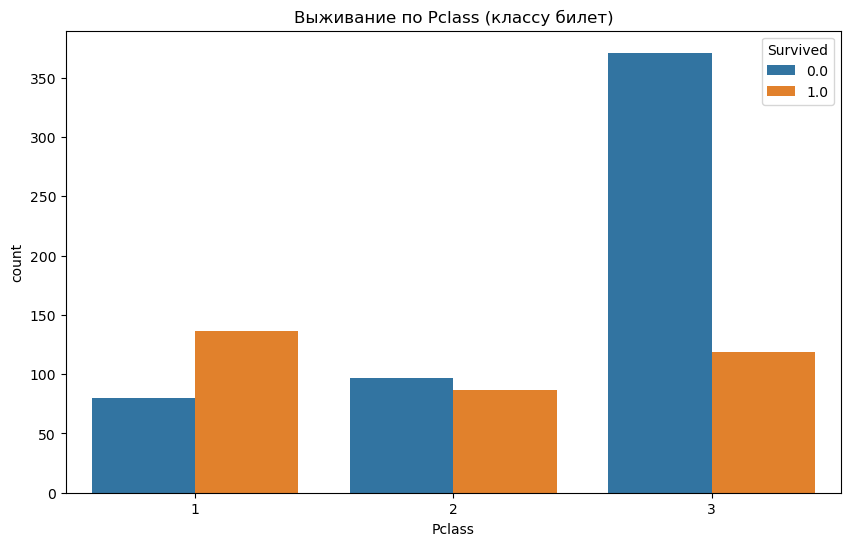

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=titanic_df[:890], x="Pclass", hue="Survived")
plt.title("Выживание по Pclass (классу билет)")
plt.show()

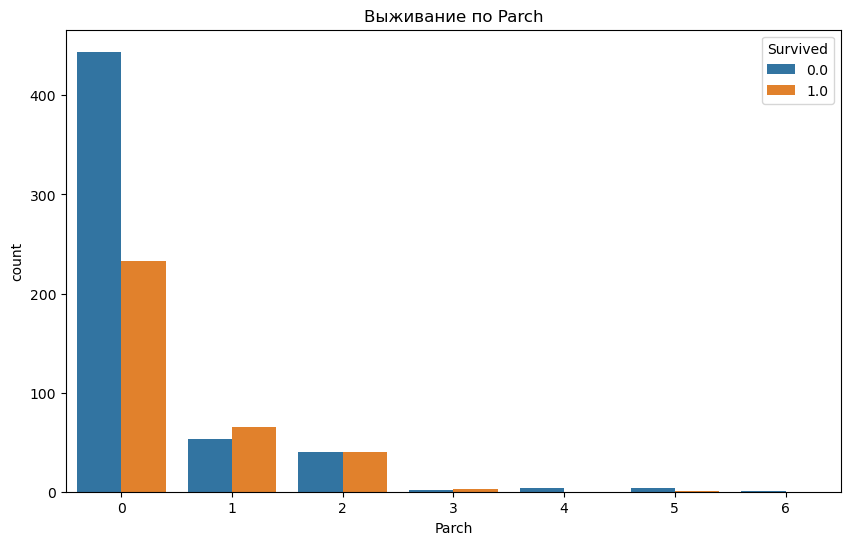

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data=titanic_df[:890], x="Parch", hue="Survived")
plt.title("Выживание по Parch")
plt.show()

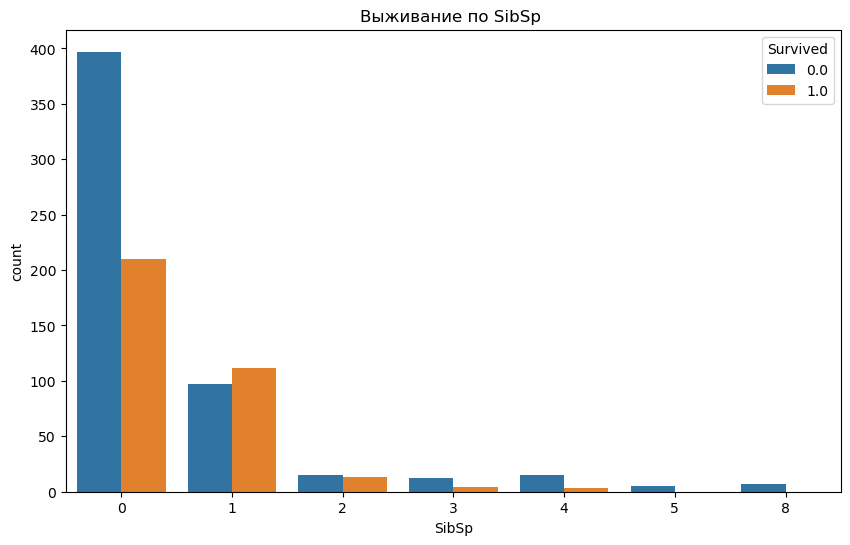

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=titanic_df[:890], x="SibSp", hue="Survived")
plt.title("Выживание по SibSp ")
plt.show()

In [19]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,FamilySize
0,22.0,Unknown,S,7.2500,Mr,0,1,3,male,1,0.0,2
1,38.0,C,C,71.2833,Mrs,0,2,1,female,1,1.0,2
2,26.0,Unknown,S,7.9250,Miss,0,3,3,female,0,1.0,1
3,35.0,C,S,53.1000,Mrs,0,4,1,female,1,1.0,2
4,35.0,Unknown,S,8.0500,Mr,0,5,3,male,0,0.0,1


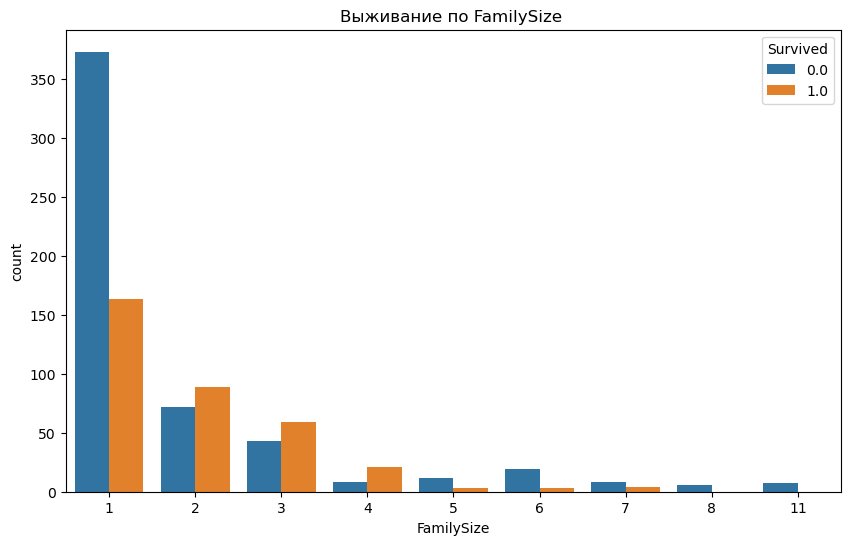

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=titanic_df[:890], x="FamilySize", hue="Survived")
plt.title("Выживание по FamilySize ")
plt.show()

In [21]:
def cat_family(num):
    if num == 1:
        return 'Alone'
    elif num < 5:
        return 'Small'
    else:
        return 'Large'

In [22]:
titanic_df['FamilySize'] = titanic_df['FamilySize'].apply(cat_family)
titanic_df = titanic_df.drop(columns=['Parch', 'SibSp'])
titanic_df.head()

,Age,Cabin,Embarked,Fare,Name,PassengerId,Pclass,Sex,Survived,FamilySize
0,22.0,Unknown,S,7.2500,Mr,1,3,male,0.0,Small
1,38.0,C,C,71.2833,Mrs,2,1,female,1.0,Small
2,26.0,Unknown,S,7.9250,Miss,3,3,female,1.0,Alone
3,35.0,C,S,53.1000,Mrs,4,1,female,1.0,Small
4,35.0,Unknown,S,8.0500,Mr,5,3,male,0.0,Alone


In [23]:
train_data, test_data = titanic_df[:891], titanic_df[891:]
train_data = train_data.drop('PassengerId', axis=1)
train_data.head()

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,FamilySize
0,22.0,Unknown,S,7.2500,Mr,3,male,0.0,Small
1,38.0,C,C,71.2833,Mrs,1,female,1.0,Small
2,26.0,Unknown,S,7.9250,Miss,3,female,1.0,Alone
3,35.0,C,S,53.1000,Mrs,1,female,1.0,Small
4,35.0,Unknown,S,8.0500,Mr,3,male,0.0,Alone


In [24]:
X, y = train_data.drop('Survived', axis=1), train_data['Survived']

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


age_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])


fare_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])


pipe = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), ['Sex', 'Embarked', 'Cabin', 'FamilySize', 'Name']),
    ('age', age_pipe, ['Age']),
    ('fare', fare_pipe, ['Fare'])
])
preproc = Pipeline([
    ('main', pipe)
])

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = preproc.fit_transform(X_train)
X_test = preproc.transform(X_test)

In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def display_metrics(y, y_pred):
    print(f"Точность: {accuracy_score(y, y_pred)}")
    print(f"f1: {f1_score(y, y_pred)}")
    print(f"recall_score: {recall_score(y, y_pred)}")
    print(f"precision_score: {precision_score(y, y_pred)}")

In [28]:
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors
from sklearn import svm
from catboost import CatBoostClassifier

In [29]:
algorithms=[
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    linear_model.LogisticRegressionCV(),
    linear_model.SGDClassifier(),

    neighbors.KNeighborsClassifier(),
    
    svm.SVC(probability=True),

    CatBoostClassifier()
]

In [30]:
from sklearn.model_selection import cross_val_score
model_names = []
CV_Accuracy=[]
for algo in algorithms:
    scores = cross_val_score(algo, X_train, y_train, cv=5)
    model_names.append(algo.__class__.__name__)
    CV_Accuracy.append(scores.mean())

Learning rate set to 0.008098
0:	learn: 0.6896282	total: 144ms	remaining: 2m 23s
1:	learn: 0.6846162	total: 145ms	remaining: 1m 12s
2:	learn: 0.6816327	total: 146ms	remaining: 48.6s
3:	learn: 0.6774749	total: 147ms	remaining: 36.7s
4:	learn: 0.6728073	total: 149ms	remaining: 29.6s
5:	learn: 0.6687170	total: 150ms	remaining: 24.9s
6:	learn: 0.6644954	total: 151ms	remaining: 21.5s
7:	learn: 0.6604872	total: 152ms	remaining: 18.9s
8:	learn: 0.6566496	total: 153ms	remaining: 16.9s
9:	learn: 0.6537875	total: 154ms	remaining: 15.3s
10:	learn: 0.6501471	total: 156ms	remaining: 14s
11:	learn: 0.6460032	total: 157ms	remaining: 12.9s
12:	learn: 0.6418300	total: 158ms	remaining: 12s
13:	learn: 0.6385119	total: 160ms	remaining: 11.2s
14:	learn: 0.6354584	total: 161ms	remaining: 10.6s
15:	learn: 0.6316253	total: 162ms	remaining: 9.99s
16:	learn: 0.6277388	total: 164ms	remaining: 9.47s
17:	learn: 0.6239835	total: 165ms	remaining: 9.01s
18:	learn: 0.6203711	total: 166ms	remaining: 8.59s
19:	learn: 0.

In [31]:
model_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': CV_Accuracy})

In [32]:
model_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,GradientBoostingClassifier,0.830070
6,CatBoostClassifier,0.827214
5,SVC,0.825805
2,LogisticRegressionCV,0.820201
4,KNeighborsClassifier,0.808963
1,RandomForestClassifier,0.804747
3,SGDClassifier,0.787905


In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.1, 0.2],
    'max_depth': [4, 5, 7],
    'subsample': [0.8, 1.0],
}
model_forest = GradientBoostingClassifier()
grid_search = GridSearchCV(model_forest, param_grid, cv=5, scoring='accuracy')

In [34]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [4, 5, 7],
                         'n_estimators': [300, 500, 700],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [35]:
grid_search.best_score_

np.float64(0.8062050625430907)

In [36]:
grid_search.best_estimator_

GradientBoostingClassifier(max_depth=5, n_estimators=300, subsample=0.8)

In [37]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
display_metrics(y_test, y_pred)

Точность: 0.7932960893854749
f1: 0.7516778523489933
recall_score: 0.7567567567567568
precision_score: 0.7466666666666667


In [38]:
test_data_PassengerId = test_data['PassengerId']
test_data = test_data.drop(columns=['PassengerId', 'Survived'], axis=1)
test_data

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,FamilySize
891,34.5,Unknown,Q,7.8292,Mr,3,male,Alone
892,47.0,Unknown,S,7.0000,Mrs,3,female,Small
893,62.0,Unknown,Q,9.6875,Mr,2,male,Alone
894,27.0,Unknown,S,8.6625,Mr,3,male,Alone
895,22.0,Unknown,S,12.2875,Mrs,3,female,Small
...,...,...,...,...,...,...,...,...
1304,NaN,Unknown,S,8.0500,Mr,3,male,Alone
1305,39.0,C,C,108.9000,Unknown,1,female,Alone
1306,38.5,Unknown,S,7.2500,Mr,3,male,Alone
1307,NaN,Unknown,S,8.0500,Mr,3,male,Alone


In [39]:
test_data.head()

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,FamilySize
891,34.5,Unknown,Q,7.8292,Mr,3,male,Alone
892,47.0,Unknown,S,7.0000,Mrs,3,female,Small
893,62.0,Unknown,Q,9.6875,Mr,2,male,Alone
894,27.0,Unknown,S,8.6625,Mr,3,male,Alone
895,22.0,Unknown,S,12.2875,Mrs,3,female,Small


In [40]:
x_test_data = preproc.transform(test_data)
y_pred = best_model.predict(x_test_data)

In [41]:
y_pred

array([0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [42]:
Submission = pd.DataFrame({'PassengerId':test_data_PassengerId,"Survived": y_pred })
Submission.head()

,PassengerId,Survived
891,892,0.0
892,893,0.0
893,894,0.0
894,895,1.0
895,896,1.0
